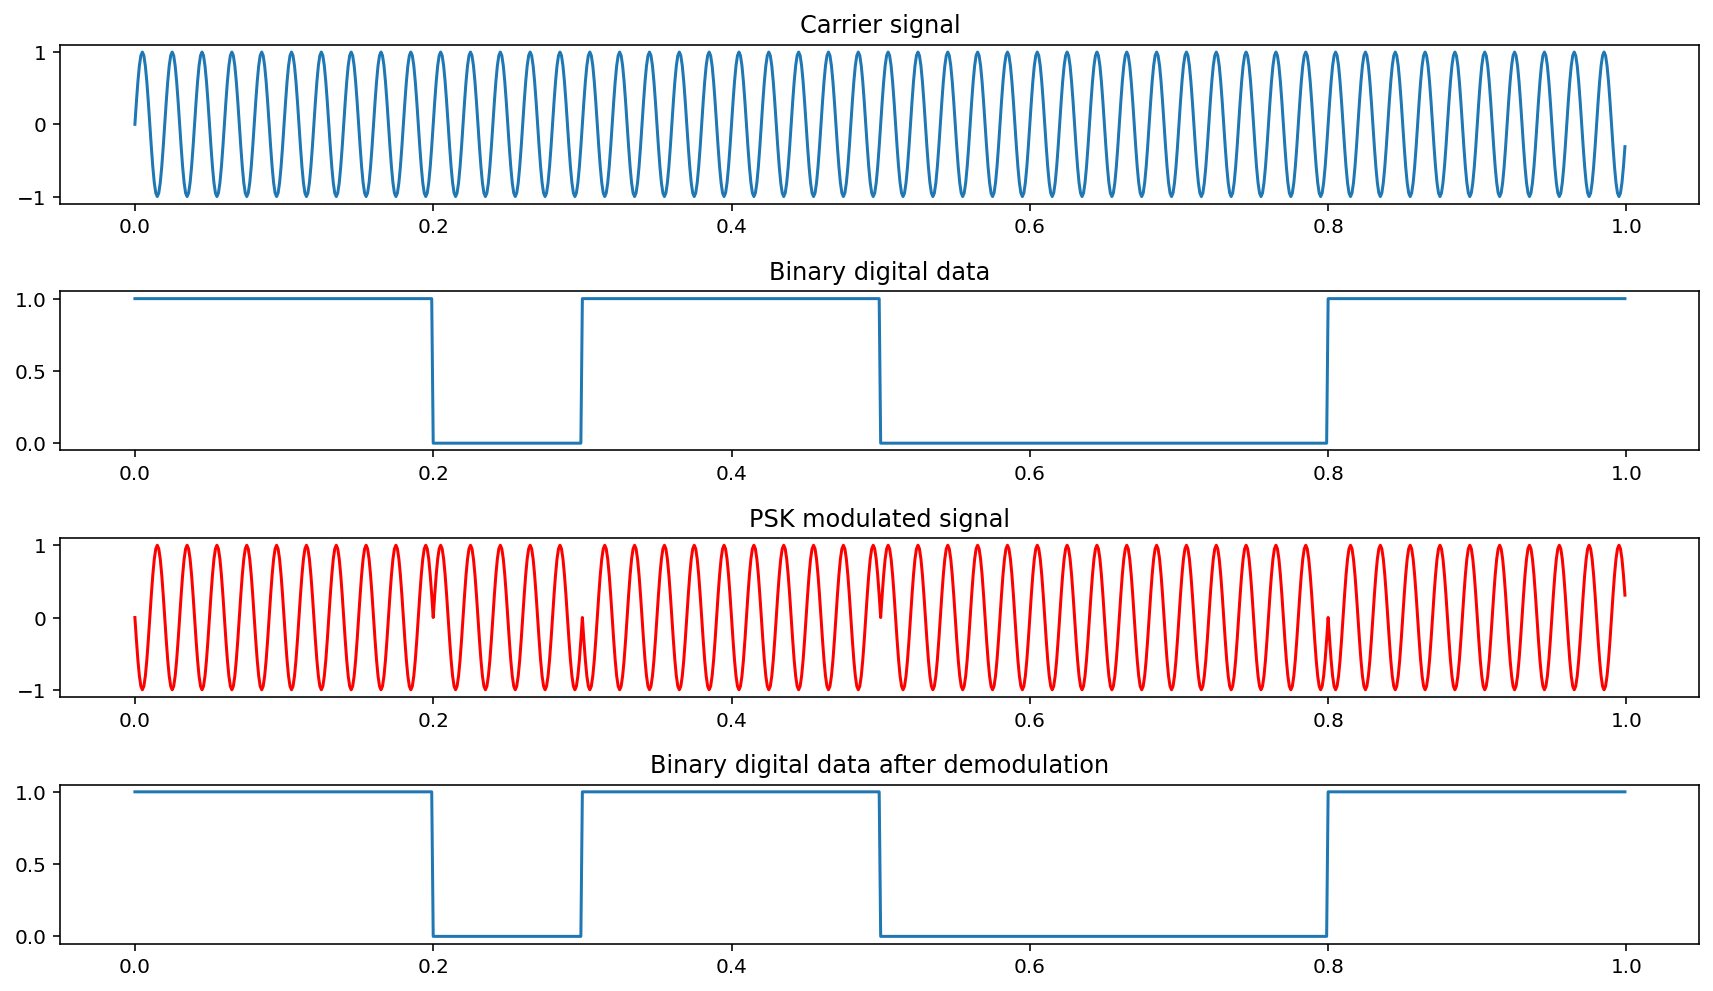

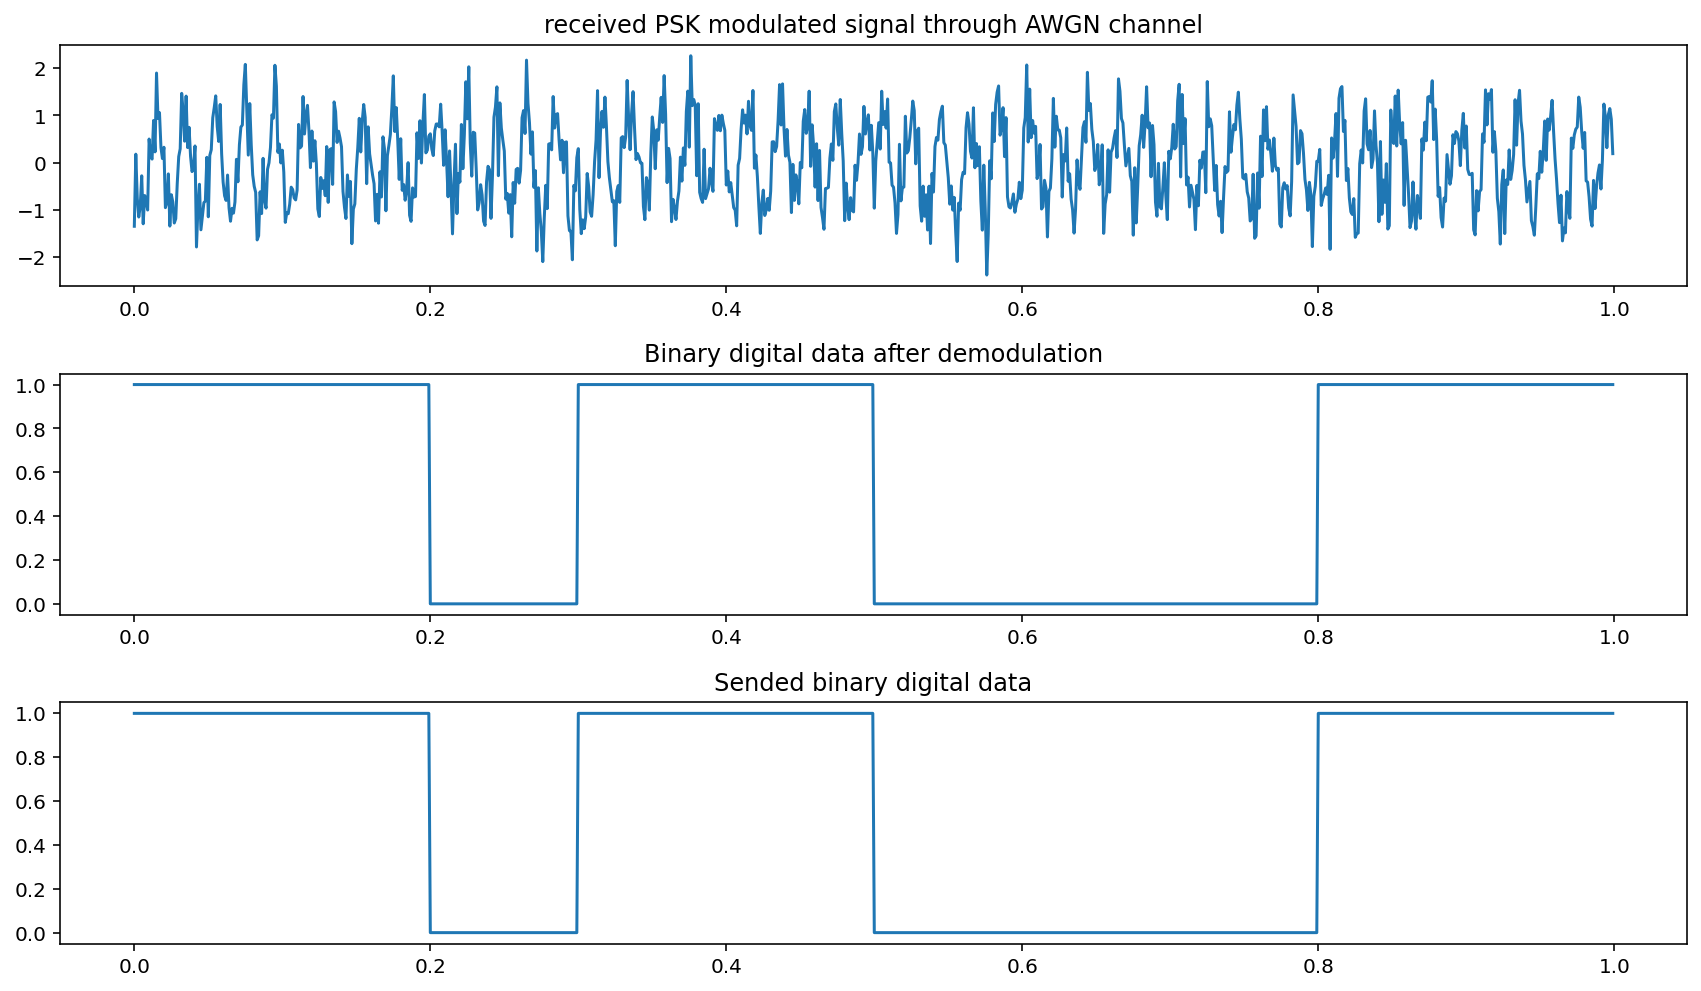

So bit loi: 
0
Xac suat loi: 
0.0


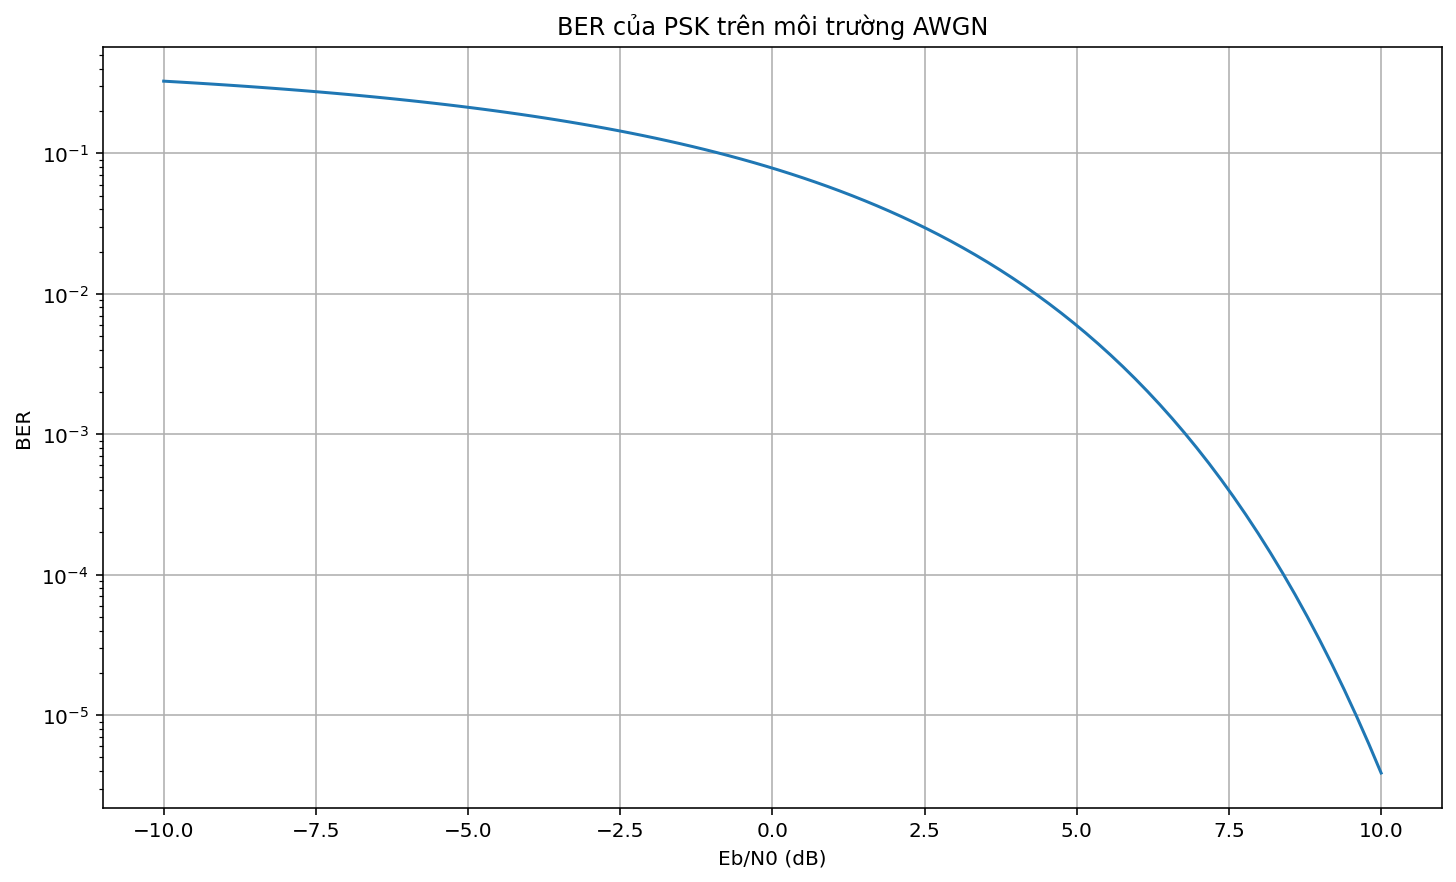

In [15]:
import matplotlib.pyplot as plt
import numpy as np
from math import pi , sqrt
from scipy.special import erfc #erfc/Q function

def binary(sym, sym_len):

  import numpy as np
  rand_n = np.random.rand(sym)
  rand_n[np.where(rand_n >= 0.5)] = 1
  rand_n[np.where(rand_n <= 0.5)] = 0

  sig = np.zeros(int(sym*sym_len))

  # generating symbols
  id1 = np.where(rand_n == 1)

  for i in id1[0]:
    temp = int(i*sym_len)
    sig[temp:temp+sym_len] = 1
  return sig

plt.close('all')
# Carrier wave and binary signal configuration parameters
Fs = 1000 # Samples per second
fc = 50 # Carrier frequency 50 Hz, 50 cycles/sec
T = 1 # Total simulation time in seconds
t = np.arange(0, T, 1/Fs)
x = np.sin(2 * pi * fc * t)
Td = 0.1 # Bit duration
Nsamples = int(Td*Fs) # Samples in one bit duration
Nsym = int(np.floor(np.size(t)/Nsamples))
# Binary waveform generation
sig = binary(Nsym,Nsamples)
# PSK waveform generation
phase=  pi*sig
Xpsk = np.sin(2*pi*fc*t + phase)

# demodulate
base = sqrt(2*fc) * np.sin(2*pi*fc* np.arange(0,Td,1/Fs)) # Co so truc chuan
symbols = Xpsk.reshape((Nsym,-1))
binary_stream = np.array([])
bitSignal = np.empty(int(Td*Fs))
for symbol in symbols:
    toaDo = np.dot(symbol, base) # Chieu len co so truc chuan
    if(toaDo>=0):
        bitSignal.fill(0)
    else:
        bitSignal.fill(1)
    binary_stream = np.append(binary_stream, bitSignal)

# Binary waveform and PSK modulation waveform Plots
figure, axis = plt.subplots(4)
axis[0].plot(t, x)
axis[0].set_title("Carrier signal")
axis[1].plot(t, sig)
axis[1].set_title("Binary digital data")
axis[2].plot(t, Xpsk, 'r')
axis[2].set_title("PSK modulated signal")
axis[3].plot(t, binary_stream)
axis[3].set_title("Binary digital data after demodulation")
plt.tight_layout()
plt.show()



# Tạo nhiễu trắng AWGN
N0 = 0.5
noise = np.random.normal(0,N0,t.size)
rSignal = Xpsk + noise

# demodulate
base = sqrt(2*fc) * np.sin(2*pi*fc* np.arange(0,Td,1/Fs)) # Co so truc chuan
symbols = rSignal.reshape((Nsym,-1))
Rbinary_stream = np.array([])
RbitSignal = np.empty(int(Td*Fs))
for symbol in symbols:
    toaDo = np.dot(symbol, base) # Chieu len co so truc chuan
    if(toaDo>=0):
        RbitSignal.fill(0)
    else:
        RbitSignal.fill(1)
    Rbinary_stream = np.append(Rbinary_stream, RbitSignal)

figure, axis = plt.subplots(3)
axis[0].plot(t, rSignal)
axis[0].set_title("received PSK modulated signal through AWGN channel")
axis[1].plot(t, Rbinary_stream)
axis[1].set_title("Binary digital data after demodulation")
axis[2].plot(t, sig)
axis[2].set_title("Sended binary digital data")
plt.tight_layout()
plt.show()

bitErr = 0;
for i in range(1,binary_stream.size):
    if binary_stream[i] != Rbinary_stream[i]:
        bitErr = bitErr + 1
BER = bitErr / binary_stream.size
print("So bit loi: ")
print(bitErr)
print("Xac suat loi: ")
print(BER)


# Tính giá trị BER tương ứng với SNR
EbN0dBs = np.linspace(-10, 10, 100)
BER = 1/2 *erfc(np.sqrt(10**(SNR/10)))

# Vẽ đồ thị BER
plt.semilogy(EbN0dBs, BER)
plt.xlabel('Eb/N0 (dB)')
plt.ylabel('BER')
plt.title('BER của PSK trên môi trường AWGN')
plt.grid()
plt.show()